In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

In [5]:
import zipfile

base_zip = r"C:\Users\Irma Nurmalasari\Downloads\CATS_DOGS.zip"

with zipfile.ZipFile(base_zip, 'r') as zip_ref:
    print(zip_ref.namelist())  # Melihat struktur file dalam ZIP


['CATS_DOGS/', 'CATS_DOGS/test/', 'CATS_DOGS/test/CAT/', 'CATS_DOGS/test/CAT/10000.jpg', 'CATS_DOGS/test/CAT/10001.jpg', 'CATS_DOGS/test/CAT/10002.jpg', 'CATS_DOGS/test/CAT/10003.jpg', 'CATS_DOGS/test/CAT/10004.jpg', 'CATS_DOGS/test/CAT/10005.jpg', 'CATS_DOGS/test/CAT/10006.jpg', 'CATS_DOGS/test/CAT/10007.jpg', 'CATS_DOGS/test/CAT/10008.jpg', 'CATS_DOGS/test/CAT/10009.jpg', 'CATS_DOGS/test/CAT/10010.jpg', 'CATS_DOGS/test/CAT/10011.jpg', 'CATS_DOGS/test/CAT/10012.jpg', 'CATS_DOGS/test/CAT/10013.jpg', 'CATS_DOGS/test/CAT/10014.jpg', 'CATS_DOGS/test/CAT/10015.jpg', 'CATS_DOGS/test/CAT/10016.jpg', 'CATS_DOGS/test/CAT/10017.jpg', 'CATS_DOGS/test/CAT/10018.jpg', 'CATS_DOGS/test/CAT/10019.jpg', 'CATS_DOGS/test/CAT/10020.jpg', 'CATS_DOGS/test/CAT/10021.jpg', 'CATS_DOGS/test/CAT/10022.jpg', 'CATS_DOGS/test/CAT/10023.jpg', 'CATS_DOGS/test/CAT/10024.jpg', 'CATS_DOGS/test/CAT/10025.jpg', 'CATS_DOGS/test/CAT/10026.jpg', 'CATS_DOGS/test/CAT/10027.jpg', 'CATS_DOGS/test/CAT/10028.jpg', 'CATS_DOGS/test

In [6]:
import zipfile
import os

base_zip = r"C:\Users\Irma Nurmalasari\Downloads\CATS_DOGS.zip"
extract_dir = r"C:\Users\Irma Nurmalasari\Downloads\CATS_DOGS"

# Ekstrak file ZIP jika folder belum ada
if not os.path.exists(extract_dir):
    with zipfile.ZipFile(base_zip, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

print("File ZIP berhasil diekstrak!")


File ZIP berhasil diekstrak!


In [7]:
import os

base_dir = r"C:\Users\Irma Nurmalasari\Downloads\CATS_DOGS\CATS_DOGS"

if os.path.exists(base_dir):
    print("Isi folder CATS_DOGS:", os.listdir(base_dir))
else:
    print(f"Folder {base_dir} tidak ditemukan.")



Isi folder CATS_DOGS: ['test', 'train']


In [8]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Gunakan direktori hasil ekstraksi
base_dir = r"C:\Users\Irma Nurmalasari\Downloads\CATS_DOGS\CATS_DOGS"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'test')  # Pastikan struktur folder sesuai

# Pastikan direktori ada
assert os.path.exists(train_dir), f"Train directory tidak ditemukan: {train_dir}"
assert os.path.exists(val_dir), f"Validation directory tidak ditemukan: {val_dir}"

# Data augmentation untuk pelatihan
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data augmentation untuk validasi (hanya rescale)
val_datagen = ImageDataGenerator(rescale=1.0/255)

# Generate data untuk pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

# Generate data untuk validasi
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 18743 images belonging to 2 classes.
Found 6251 images belonging to 2 classes.


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

c:\Users\Irma Nurmalasari\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
import scipy.ndimage



In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_generator,
    validation_steps=50
)

c:\Users\Irma Nurmalasari\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.4934 - loss: 0.7732 - val_accuracy: 0.4819 - val_loss: 0.7079
Epoch 2/10
 92/100 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.5290 - loss: 0.6914

c:\Users\Irma Nurmalasari\anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


100/100 ━━━━━━━━━━━━━━━━━━━━ 181s 2s/step - accuracy: 0.5298 - loss: 0.6912 - val_accuracy: 0.5813 - val_loss: 0.6666
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 159s 2s/step - accuracy: 0.5922 - loss: 0.6748 - val_accuracy: 0.5469 - val_loss: 0.6902
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 166s 2s/step - accuracy: 0.5357 - loss: 0.6904 - val_accuracy: 0.5194 - val_loss: 0.7550
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.5897 - loss: 0.6603 - val_accuracy: 0.6119 - val_loss: 0.6565
Epoch 6/10
 86/100 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.6251 - loss: 0.6606

c:\Users\Irma Nurmalasari\anaconda3\lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.6228 - loss: 0.6605 - val_accuracy: 0.6156 - val_loss: 0.6339
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 136s 1s/step - accuracy: 0.6455 - loss: 0.6392 - val_accuracy: 0.6400 - val_loss: 0.6399
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6268 - loss: 0.6385 - val_accuracy: 0.6706 - val_loss: 0.6123
Epoch 9/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.6279 - loss: 0.6443 - val_accuracy: 0.6825 - val_loss: 0.5979
Epoch 10/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 119s 1s/step - accuracy: 0.6618 - loss: 0.6178 - val_accuracy: 0.6687 - val_loss: 0.5926


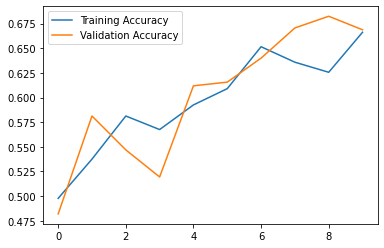

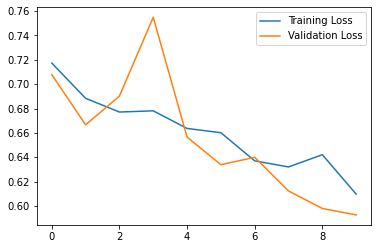

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.legend()
plt.show()

In [15]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = r"c:\Users\Irma Nurmalasari\Downloads\CATS_DOGS\CATS_DOGS\test\CAT\9968.jpg"  # Ganti dengan gambar uji
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("It's a Dog!")
else:
    print("It's a Cat!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
It's a Cat!


In [16]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
base_model.trainable = False  # Freeze base model

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 300s 5us/step


In [22]:
import numpy as np
from tensorflow.keras.preprocessing import image

img_path = r"c:\Users\Irma Nurmalasari\Downloads\CATS_DOGS\CATS_DOGS\test\DOG\9990.jpg"# Ganti dengan gambar uji
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

if prediction[0][0] > 0.5:
    print("It's a Dog!")
else:
    print("It's a Cat!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
It's a Dog!
